In [7]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

jacob_TM_ (generic function with 1 method)

In [8]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
E, x, y = 0..30, 0..1, 0..1
box = E × x × y
using CairoMakie, GLMakie

In [9]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [10]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

In [11]:
I0 = -1.7064; U0 = 0.265;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.254587677389917, 0.7099299111721875, 0.549798431121074]
println("last point trajectory:$u0")

last point trajectory:[8.254587677389917, 0.7099299111721875, 0.549798431121074]


In [13]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = 0);

In [14]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-6 + fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.345677548495324
 0.7384953729692035
 0.43830227172236025

In [15]:
hom = CoupledODEs(TM, shift, p, diffeq = integ_set)
trhom, trange = trajectory(hom, time; Δt = integ_set.dt, Ttr = 0);

In [18]:
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 8.34568  0.738495  0.438302

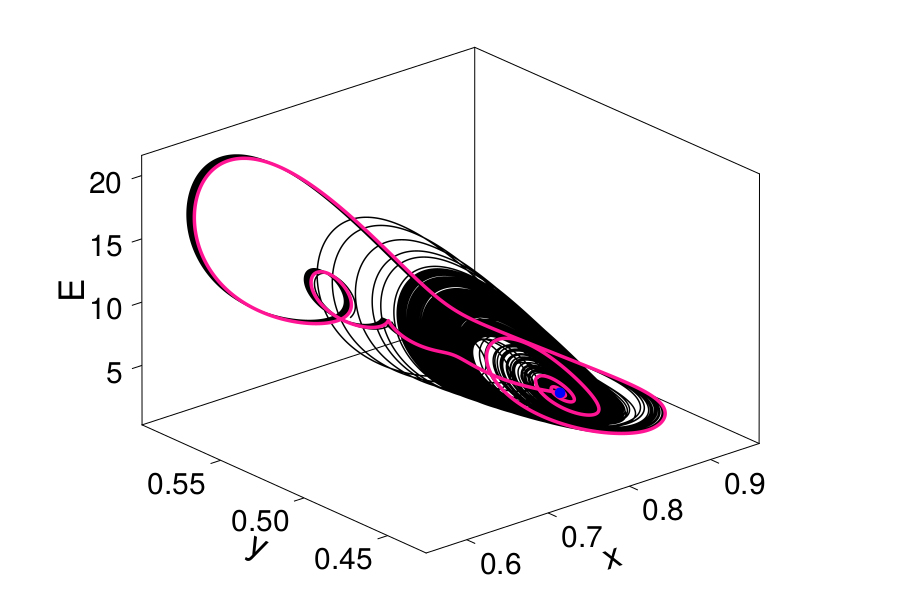

CairoMakie.Screen{IMAGE}


In [21]:
ts, tf = 1, 300000
tsh, tfh = 1, 17000
indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)



lines!(axis3, tr[ts:tf, indexx], tr[ts:tf, indexy], tr[ts:tf, indexz], linewidth = 1.5, color = :black)
lines!(axis3, trhom[tsh:tfh, indexx], trhom[tsh:tfh, indexy], trhom[tsh:tfh, indexz], linewidth = 3.5, color = :deeppink)
scatter!(fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :blue, markersize = 15.0)
display(f)

In [22]:
save("shilnikov_attractor.eps", f)

CairoMakie.Screen{EPS}
